In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
# import tpot as tp

import os

In [98]:
path = os.path.dirname(os.getcwd())

In [99]:
trainingData = pd.read_csv(path + "/dataset/train.csv")
testData = pd.read_csv(path + "/dataset/test.csv")
testAnswers = pd.read_csv(path + "/dataset/gender_submission.csv")

trainingData.pop("PassengerId")
testData.pop("PassengerId")
trainingData.pop("Name")
testData.pop("Name")
trainingData.pop("Ticket")
testData.pop("Ticket")
trainingData.pop("Cabin")
testData.pop("Cabin")

testAnswers.pop("PassengerId")

0       892
1       893
2       894
3       895
4       896
       ... 
413    1305
414    1306
415    1307
416    1308
417    1309
Name: PassengerId, Length: 418, dtype: int64

In [100]:
set(trainingData.Embarked)

{'C', 'Q', 'S', nan}

In [101]:
set(testData.Embarked)

{'C', 'Q', 'S'}

In [102]:
genderConversion = {'male': 0, 'female': 1}
embarkedConversion = {'S': 1, 'C': 2, 'Q': 3 }

trainingData.Sex = trainingData.Sex.map(genderConversion)
testData.Sex = testData.Sex.map(genderConversion)
trainingData.Embarked = trainingData.Embarked.map(embarkedConversion)
testData.Embarked = testData.Embarked.map(embarkedConversion)

trainingData.Embarked = trainingData.Embarked.fillna(0)

target = trainingData.pop("Survived")
trainingData = pd.concat([trainingData, target], axis=1)

In [103]:
trainingData

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,0,22.0,1,0,7.2500,1.0,0
1,1,1,38.0,1,0,71.2833,2.0,1
2,3,1,26.0,0,0,7.9250,1.0,1
3,1,1,35.0,1,0,53.1000,1.0,1
4,3,0,35.0,0,0,8.0500,1.0,0
...,...,...,...,...,...,...,...,...
886,2,0,27.0,0,0,13.0000,1.0,0
887,1,1,19.0,0,0,30.0000,1.0,1
888,3,1,NaN,1,2,23.4500,1.0,0
889,1,0,26.0,0,0,30.0000,2.0,1


In [104]:
testData

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,34.5,0,0,7.8292,3
1,3,1,47.0,1,0,7.0000,1
2,2,0,62.0,0,0,9.6875,3
3,3,0,27.0,0,0,8.6625,1
4,3,1,22.0,1,1,12.2875,1
...,...,...,...,...,...,...,...
413,3,0,NaN,0,0,8.0500,1
414,1,1,39.0,0,0,108.9000,2
415,3,0,38.5,0,0,7.2500,1
416,3,0,NaN,0,0,8.0500,1


In [105]:
testAnswers

,Survived
0,0
1,1
2,0
3,0
4,1
...,...
413,0
414,1
415,0
416,0


In [106]:
xTraining = trainingData.drop(columns=["Survived"])
yTraining = trainingData["Survived"]

model = DecisionTreeClassifier()
model.fit(xTraining, yTraining)

DecisionTreeClassifier()

[Text(0.3875, 0.9, 'Sex <= 0.5\ngini = 0.473\nsamples = 100.0%\nvalue = [0.616, 0.384]'),
 Text(0.15, 0.7, 'Age <= 6.5\n0.442\n64.8%\n[0.811, 0.189]'),
 Text(0.1, 0.5, '0.444\n2.7%\n[0.333, 0.667]'),
 Text(0.2, 0.5, 'Pclass <= 1.5\n0.28\n62.1%\n[0.832, 0.168]'),
 Text(0.1, 0.3, 'Age <= 53.0\n0.46\n13.5%\n[0.642, 0.358]'),
 Text(0.05, 0.1, '\n  (...)  \n'),
 Text(0.15, 0.1, '\n  (...)  \n'),
 Text(0.3, 0.3, 'Age <= 13.0\n0.204\n48.6%\n[0.885, 0.115]'),
 Text(0.25, 0.1, '\n  (...)  \n'),
 Text(0.35, 0.1, '\n  (...)  \n'),
 Text(0.625, 0.7, 'Pclass <= 2.5\n0.436\n35.2%\n[0.258, 0.742]'),
 Text(0.45, 0.5, 'Embarked <= 1.5\n0.252\n19.1%\n[0.053, 0.947]'),
 Text(0.4, 0.3, '0.117\n13.1%\n[0.068, 0.932]'),
 Text(0.5, 0.3, 'Age <= 49.5\n0.046\n5.9%\n[0.019, 0.981]'),
 Text(0.45, 0.1, '\n  (...)  \n'),
 Text(0.55, 0.1, '\n  (...)  \n'),
 Text(0.8, 0.5, 'Fare <= 23.35\n0.498\n16.2%\n[0.5, 0.5]'),
 Text(0.7, 0.3, 'Age <= 16.5\n0.5\n13.1%\n[0.41, 0.59]'),
 Text(0.65, 0.1, '\n  (...)  \n'),
 Text(0.

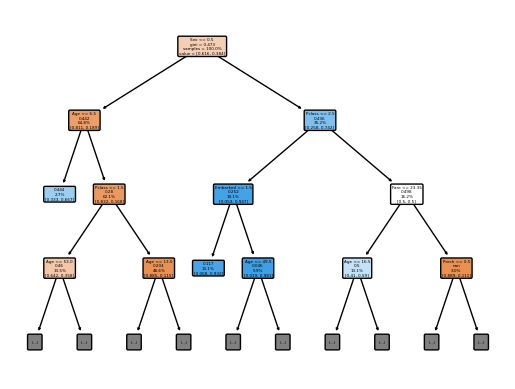

In [107]:
tree.plot_tree(model, feature_names=['Pclass', 'Sex', 'Age', 'SibSP', 'Parch', 'Fare', 'Embarked'] , rounded=True, filled=True, label='root', max_depth=3, proportion=True)

In [108]:
prediction = model.predict(testData)
accuracy = accuracy_score(testAnswers, prediction)
accuracy

0.8708133971291866